## Аналитика в Яндекс.Афише

### Импортируем необходимые модули и библиотеки

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy

<a id='section1'></a>
### 1. Загрузка данных и их подготовка к анализу

In [2]:
# загрузим все необходимые данные 
visits_log = pd.read_csv('/datasets/visits_log.csv') # данные о визитах
orders_log = pd.read_csv('/datasets/orders_log.csv') # данные о заказах
costs = pd.read_csv('/datasets/costs.csv') # данные о расходах

<a id='section1.1'></a>
**Исследуем первый набор данных - Visits_log.**

In [3]:
visits_log.shape

(359400, 5)

In [4]:
#выведем первые 5 строк
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
# выведем последние 5 строк
visits_log.tail()

,Device,End Ts,Source Id,Start Ts,Uid
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


In [6]:
# заметим, что некоторые названия столбцов отображены с пробелами, исправим это
visits_log.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [7]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [8]:
visits_log['device'].unique()

array(['touch', 'desktop'], dtype=object)

In [9]:
visits_log['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

In [10]:
# в данном наборе есть два признака с датой и временем, преобразуем их к соответствующему типу
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'])
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'])

In [11]:
# проверим есть ли в данных дубликаты
visits_log.duplicated().sum()

0

In [12]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


**Вывод:** в логе о посещениях сайта Яндекс.Афиша присутствует 5 признаков. Два признака `Start Ts` и `End Ts` содержат в себе данные о дате и времени, поэтому я преобразовал их к соответствующему типу. Признак `Uid` имеет тип *uint64*, то есть беззнаковый int, так как идентификатор пользователя не может быть отрицательным значением.\
Всего в логе **359400** записей. Дубликатов и пропусков нет. Стоит также заметить, что пользователи приходили со всех источников, кроме источника с номером 8, если таковой существует.

<a id='section1.2'></a>
**Исследуем второй набор данных - Orders_log.**

In [13]:
orders_log.shape

(50415, 3)

In [14]:
# посмотрим на первые 5 записей в логе
orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [15]:
# посмотрим на последние 5 записей в логе
orders_log.tail()

,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [16]:
# изменим названия колонок
orders_log.columns = ['buy_ts', 'revenue', 'uid']

In [17]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [18]:
# преобразуем признак buy_ts к типу datetime
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'])

In [19]:
# проверим дубликаты
orders_log.duplicated().sum()

0

**Вывод:** в наборе данных о заказах представлено 3 признака. Признак `Buy Ts` содержит информацию о дате и времени покупки, поэтому я преобразовал его к типу *datetime*. `Uid` имеет тип *uint64*, как и в предыдущем наборе.\
Всего представлено **50415** записей. Пропусков и дубликатов нет.

<a id='section1.3'></a>
**Исследуем третий набор данных - costs.**

In [20]:
costs.shape

(2542, 3)

In [21]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [22]:
costs.tail()

,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


In [23]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [24]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [25]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [26]:
costs.duplicated().sum()

0

**Вывод:** в данном наборе три признака. Признак `dt` содержит дату, поэтому я преобразовал его к типу *datetime*.\
Всего в наборе **2542** записей. Дубликатов и пропусков нет.\
Стоит заметить, что в датасете не представлена информация о затратах на маркетинг в рекламном источнике №6 и №7. Источник №8 также не представлен.

<a id='section2'></a>
### 2. Построим отчеты и посчитаем метрики

### Продукт

<a id='section2.1'></a>
**Сколько людей пользуются продуктом в день, неделю, месяц?**

In [27]:
# посчитаем такие метрики, как DAU, WAU, MAU
# для этого используем датасет с визитами пользователей
visits_log.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [28]:
# выделим из данных день, неделю и месяц, а также отдельно дату (для группировки)
#visits_log['day'] = visits_log['start_ts'].dt.day
visits_log['week'] = visits_log['start_ts'].dt.week
visits_log['month'] = visits_log['start_ts'].dt.month
visits_log['year'] = visits_log['start_ts'].dt.year
visits_log['date'] = visits_log['start_ts'].dt.date

visits_log.head(3)

,device,end_ts,source_id,start_ts,uid,week,month,year,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017,2017-07-01


In [29]:
dau = int(visits_log.groupby('date').agg({'uid':'nunique'}).mean())
wau = int(visits_log.groupby(['year', 'week']).agg({'uid':'nunique'}).mean())
mau = int(visits_log.groupby(['year', 'month']).agg({'uid':'nunique'}).mean())

In [30]:
print('DAU:', dau)
print('WAU:', wau)
print('MAU:', mau)

DAU: 907
WAU: 5716
MAU: 23228


In [31]:
# посчитаем также sticky factor - степень лояльности, вовлеченности
week_sticky_factor = dau / wau * 100
month_sticky_factor = dau / mau * 100

print('Week sticky factor:', week_sticky_factor)
print('Month sticky factor:', month_sticky_factor)

Week sticky factor: 15.867739678096571
Month sticky factor: 3.9047701050456345


**Вывод:** согласно результатам в общем случае
- в день продуктом пользуется 907 уникальных пользователей;
- в неделю продуктом пользуется 5716 уникальных пользователей;
- в месяц продуктом пользуется 23228 уникальных пользователей.

Также я посчитал дополнительно **"Sticky factor"** - степень лояльности и вовлеченности пользователя, то есть регулярность использования продукта.\
Так, в неделю к продукту возвращаются около **16%** пользователей, а в месяц - около **4%**.

**Посмотрим также на данные метрики в разрезе по девайсам и источникам.**

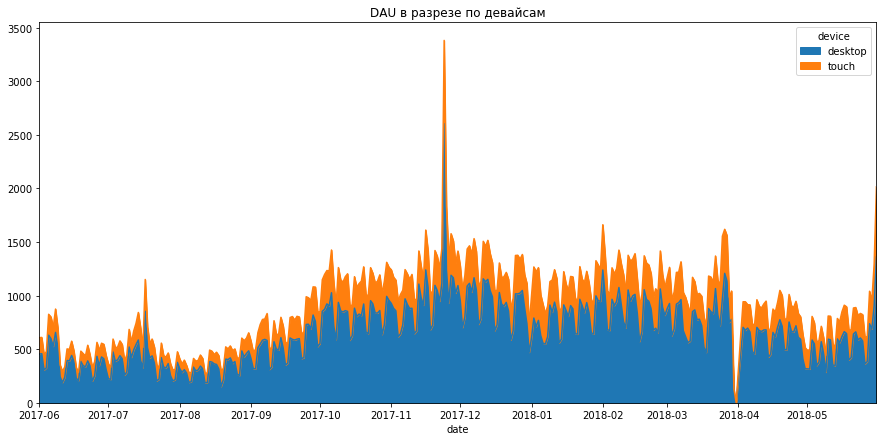

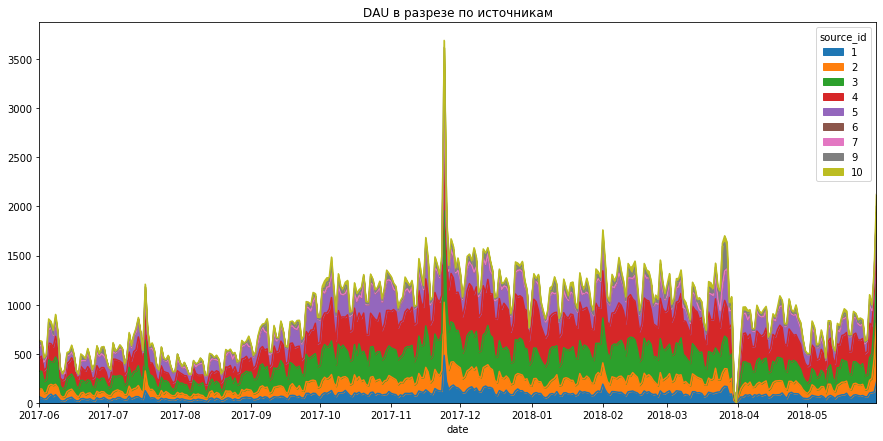

In [32]:
visits_log.pivot_table(index='date', 
                       columns='device', 
                       values='uid', 
                       aggfunc='nunique').plot(figsize=(15,7), kind='area', stacked=True)
plt.title('DAU в разрезе по девайсам')
plt.show()
visits_log.pivot_table(index='date', 
                       columns='source_id', 
                       values='uid', 
                       aggfunc='nunique').plot(figsize=(15,7), kind='area', stacked=True)
plt.title('DAU в разрезе по источникам')
plt.show()

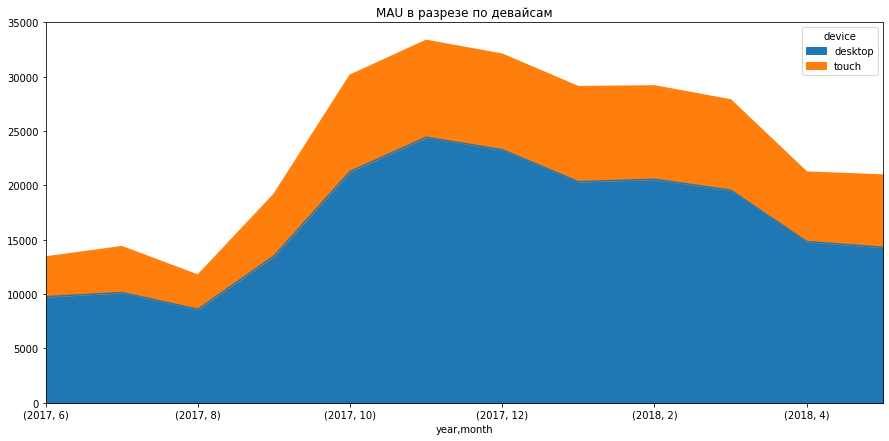

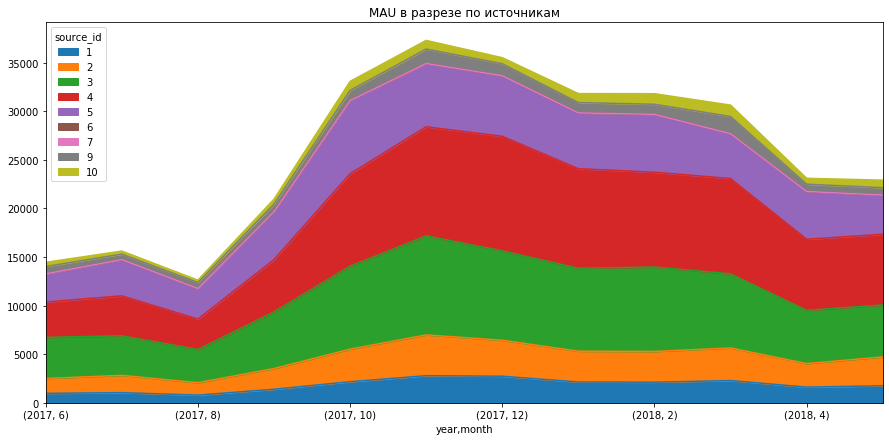

In [33]:
visits_log.pivot_table(index=['year', 'month'], 
                       columns='device', 
                       values='uid', 
                       aggfunc='nunique').plot(figsize=(15,7), kind='area', stacked=True)
plt.title('MAU в разрезе по девайсам')
plt.show()
visits_log.pivot_table(index=['year', 'month'], 
                       columns='source_id', 
                       values='uid', 
                       aggfunc='nunique').plot(figsize=(15,7), kind='area', stacked=True)
plt.title('MAU в разрезе по источникам')
plt.show()

**Вывод:** исследуя все 4 графика, можно сделать следующие выводы
- во-первых, наибольшее количество уникальных пользователей в день и в месяц приходится на пользователей, заходящих на сервис с компьютера. Что касается источников, то наибольшее количество пользователей приходится на рекламные источники №2,3,4,5.
- во-вторых, больше всего пользователей посещало Яндекс.Афишу в период с октября по декабрь 2017 года, причем резко.

<a id='section2.2'></a>
**Сколько сессий в день?**

In [34]:
# найдем количество сессий на пользователя за день
sessions_per_user = visits_log.groupby(['year', 'month', 'date']).agg({'uid':['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user

n_sessions  n_users  sessions_per_user
year month date                                              
2017 6     2017-06-01         664      605           1.097521
           2017-06-02         658      608           1.082237
           2017-06-03         477      445           1.071910
           2017-06-04         510      476           1.071429
           2017-06-05         893      820           1.089024
...                           ...      ...                ...
2018 5     2018-05-27         672      620           1.083871
           2018-05-28        1156     1039           1.112608
           2018-05-29        1035      948           1.091772
           2018-05-30        1410     1289           1.093871
           2018-05-31        2256     1997           1.129695

[364 rows x 3 columns]

**Вывод:** по результатам вычислений можно сказать, что один пользователь пользуется продуктом **1 раз в день.** Может быть, такой результат логичен: пользователь заходит на Яндекс.Афишу, чтобы посмотреть расписание/мероприятие на сегодня, выбирает подходящее для себя и больше сервис ему не требуется.

Посмотрим, сколько сессий в день приходится на пользователя в разрезе платформ.

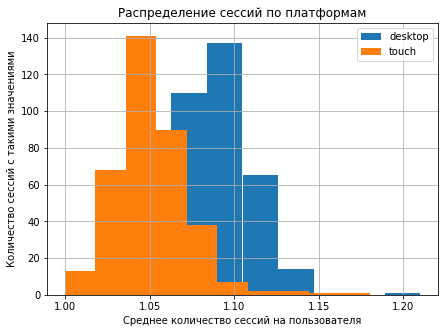

In [35]:
platforms = ['desktop', 'touch']
for platform in platforms:
    sessions_per_user = visits_log.query('device == @platform').groupby(['year', 'month', 'date']).agg({'uid':['count', 'nunique']})
    sessions_per_user.columns = ['n_sessions', 'n_users']
    sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
    sessions_per_user['sessions_per_user'].hist(figsize=(7,5))
    plt.legend(platforms)
    #print(sessions_per_user)
plt.title('Распределение сессий по платформам')
plt.xlabel('Среднее количество сессий на пользователя')
plt.ylabel('Количество сессий с такими значениями')
plt.show()

Теперь посмотрим на пользователей, пришедших с разных ресурсов.

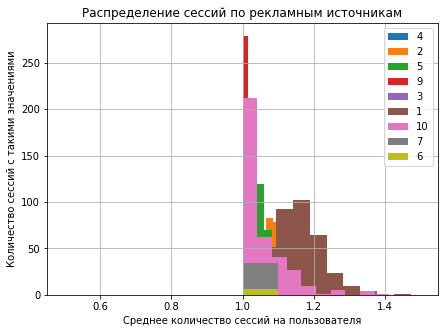

In [36]:
sources = visits_log['source_id'].unique()
for source in sources:
    sessions_per_user = visits_log.query('source_id == @source').groupby(['year', 'month', 'date']).agg({'uid':['count', 'nunique']})
    sessions_per_user.columns = ['n_sessions', 'n_users']
    sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
    sessions_per_user['sessions_per_user'].hist(figsize=(7,5))
    plt.legend(sources)
plt.title('Распределение сессий по рекламным источникам')
plt.xlabel('Среднее количество сессий на пользователя')
plt.ylabel('Количество сессий с такими значениями')
plt.show()

**Вывод:** как видно по графикам, результаты не изменились по сравнению с общем случаем. То есть в среднем на пользователя приходится 1 сессия независимо от платформ и рекламного источника.

<a id='section2.3'></a>
**Сколько длится одна сессия?**

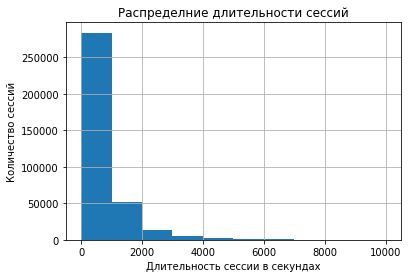

In [37]:
# вычислим длительность каждой сессии в секундах
visits_log['session_duration_sec'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds
# посмотрем на распределение длительности сессий
visits_log['session_duration_sec'].hist(range=(0,10000))
plt.title('Распределние длительности сессий')
plt.xlabel('Длительность сессии в секундах')
plt.ylabel('Количество сессий')
plt.show()

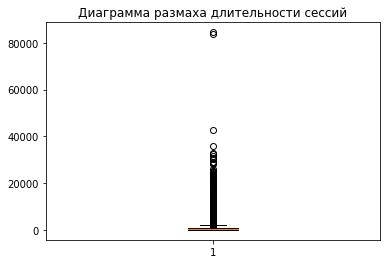

In [38]:
# построим также диграмму размаха
plt.boxplot(visits_log['session_duration_sec'])
plt.title('Диаграмма размаха длительности сессий')
plt.show()

In [39]:
# вычислим ASL - среднуюю продолжительность сессии
print('ASL mean:', visits_log['session_duration_sec'].mean())
print('ASL mode:', visits_log['session_duration_sec'].mode()[0])

ASL mean: 643.506488592098
ASL mode: 60


**Вывод:** учитывая, что распределение не нормальное, лучше смотреть не на среднюю оценку, а на моду. Таким образом, **пользователь тратит на 1 сессию в среднем 60 секунд.** Довольно немного.\
Также можно заметить, что есть и выбросы, то есть какие-то пользователи используют сервис более 5 часов за сессию, есть такие, чьи сессии длятся почти сутки (22 часа).

**Теперь посмотрим на распределение сессий по платформам и рекламным источникам.**

,count,mean,mode
device,,,
desktop,262567,703.946977,60
touch,96833,479.619407,60


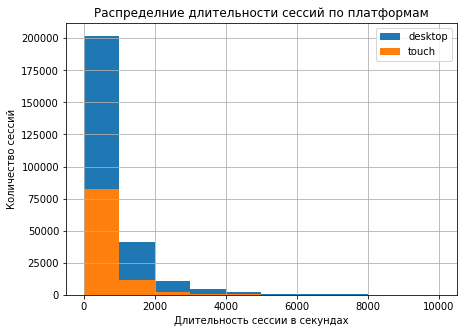

In [40]:
# распределение по платформам
for platform in platforms:
    slice = visits_log.query('device == @platform')['session_duration_sec']
    slice.hist(figsize=(7,5), range=(0,10000))
    plt.legend(platforms)
plt.title('Распределние длительности сессий по платформам')
plt.xlabel('Длительность сессии в секундах')
plt.ylabel('Количество сессий')
#plt.show()
# вычислим также ASL - среднуюю продолжительность сессии
sess_by_device = visits_log.groupby('device').agg({'session_duration_sec':['count', 'mean', lambda x: scipy.stats.mode(x)[0]]})
sess_by_device.columns = ['count', 'mean', 'mode']
sess_by_device


,count,mean,mode
source_id,,,
4,101794,559.841042,60
3,85610,573.283705,60
5,66905,526.742187,60
2,47626,844.717318,60
1,34121,1039.361156,60
9,13277,572.543496,60
10,10025,662.443890,60
7,36,606.666667,120
6,6,1370.000000,0


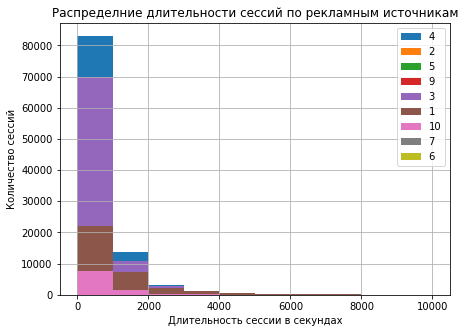

In [41]:
# распределение по рекламным источникам

for source in sources:
    slice = visits_log.query('source_id == @source')['session_duration_sec']
    slice.hist(figsize=(7,5), range=(0,10000))
    plt.title('Распределние длительности сессий по рекламным источникам')
    plt.legend(sources)
plt.title('Распределние длительности сессий по рекламным источникам')
plt.xlabel('Длительность сессии в секундах')
plt.ylabel('Количество сессий')
# вычислим также ASL - среднуюю продолжительность сессии
sess_by_source = (visits_log.groupby('source_id')
                            .agg({'session_duration_sec':['count','mean', lambda x: scipy.stats.mode(x)[0]]}))
sess_by_source.columns = ['count','mean', 'mode']
sess_by_source.sort_values(by='count', ascending=False)

**Вывод:** как видим, в целом результаты такие же как и в общем случае, средняя продолжнительность сессии на пользователя в зависимости от девайса и источника привелечения также **60 секунд**.

<a id='section2.4'></a>
**Как часто люди возвращаются?**

В данном пункте посчитаем **Retention Rate** за месяц в общем случае, а также в разрезе платформ и источников.

In [42]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid,week,month,year,date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,52,12,2017,2017-12-27,0


In [43]:
visits_log['month'] = visits_log['date'].astype('datetime64[M]')
first_session_month = visits_log.groupby('uid')['month'].min()
first_session_month.name = 'first_session_month'
visits_log = visits_log.join(first_session_month, on='uid')

In [44]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid,week,month,year,date,session_duration_sec,first_session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,2017-12-01,2017,2017-12-20,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2018-02-01,2018,2018-02-19,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,2017-07-01,2017,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-01,2018,2018-05-20,1440,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,52,2017-12-01,2017,2017-12-27,0,2017-12-01


In [45]:
# найдем lifetime каждого пользователя
visits_log['cohort_lifetime'] = ((visits_log['month'] - visits_log['first_session_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [46]:
# сгруппируем данные по когорте и lifetime
# посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»
cohorts = visits_log.groupby(['first_session_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

# найдём исходное количество пользователей в когорте, возьмём их число на нулевую неделю
initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_session_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})
cohorts = pd.merge(cohorts, initial_users_count, on='first_session_month')
cohorts

,first_session_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [47]:
# посчитаем retention
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts['first_session_month'] = cohorts['first_session_month'].dt.strftime('%Y-%m')
retention_pivot = cohorts.pivot_table(index='first_session_month',
                                     columns='cohort_lifetime',
                                     values='retention',
                                     aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


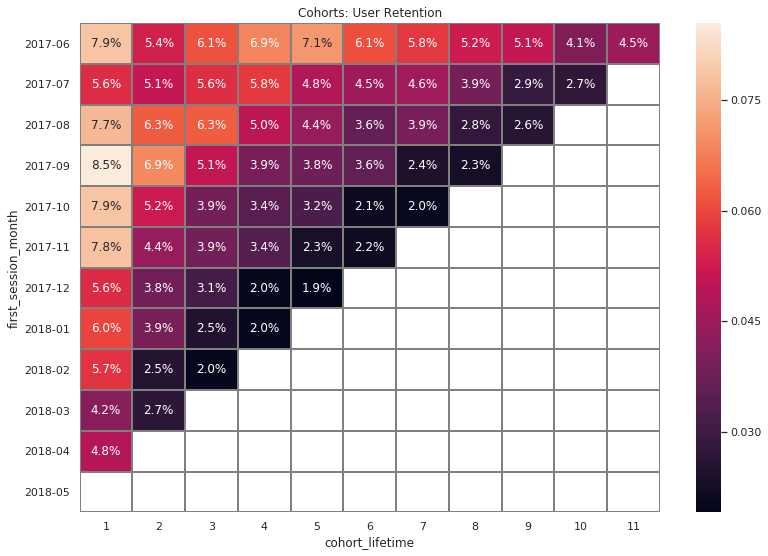

In [48]:
# создадим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot.drop(columns=[0]), annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

**Вывод:** по итоговой таблице видно, что Retention Rate довольно низкий. Конвертация пользователей ни одной из когорт не превысила 10% ни за первый, ни за последующие месяцы. Самый высокий Retention Rate за первый месяц у пользователей, которые пришли осенью 2017 года, в частности, самый большое удержание после первого месяца было у пользователей, пришедших в сентябре 2017. Наиболее лояльными оказались пользователи, пришедшие в июне 2017 года.

**Теперь посчитаем в разрезе устройств и рекламных источников.**

In [49]:
# для начала создадим профиль пользователя - датафрейм, в котором есть дата, источник и устройство первого посещения
costs = costs.rename(columns={'dt':'acquisition_date'})

users = (visits_log.sort_values(by = ['uid', 'start_ts']).groupby('uid')
                   .agg({'start_ts' : 'first', 'source_id' : 'first', 'device': 'first'}) # берем платформу и источник
                   .rename(columns = {'start_ts' : 'acquisition_ts'}))                    # при первой сессии

users['acquisition_date'] = users['acquisition_ts'].dt.date # дата начала первой сессии
users['acquisition_month'] = users['acquisition_ts'].astype('datetime64[M]') # месяц начала первой сессии
users = (users.reset_index().set_index(['source_id', 'acquisition_date'])
      .join(costs.set_index(['source_id', 'acquisition_date']), how = 'left'))

# добавим стоимость приобретения индивидуального пользователя, 
# то есть сколько потратили в среднем индивидуально на каждого пользователя
user_cost = (users.groupby(['source_id', 'acquisition_date']).agg({'device':'count', 'costs':'max'})
                  .rename(columns = {'device':'users'}))
user_cost['acquisition_cost'] = user_cost['costs'] / user_cost['users']
users = users.join(user_cost[['acquisition_cost']], how='left')
users = users.reset_index().set_index('uid')[['acquisition_ts', 'acquisition_date', 'acquisition_month',
                                             'source_id', 'device', 'acquisition_cost']]
users.head()

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6


In [50]:
# в данном случае посчитаем ретеншен всех пользователей, но в зависимости от девайсов и рекламных источников
# прежде нужно найти lifetime пользователя, возьмем его из таблицы orders и сджоиним с таблицей users

cohorts = (visits_log[['uid', 'cohort_lifetime']].set_index('uid').join(users, on='uid', how='left')).reset_index()
cohorts.head()

,uid,cohort_lifetime,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost
0,16879256277535980062,0,2017-12-20 17:20:00,2017-12-20,2017-12-01,4,touch,0.678254
1,104060357244891740,0,2018-02-19 16:53:00,2018-02-19,2018-02-01,2,desktop,2.272459
2,7459035603376831527,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,5,touch,0.579286
3,16174680259334210214,2,2018-03-09 20:05:00,2018-03-09,2018-03-01,4,desktop,0.307036
4,9969694820036681168,0,2017-12-27 14:06:00,2017-12-27,2017-12-01,3,desktop,0.980877


In [51]:
cohorts_device = cohorts.groupby(['device', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts_source = cohorts.groupby(['source_id', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [52]:
# найдём исходное количество пользователей в когорте девайсов, возьмём их число на нулевую неделю
initial_users_cnt_dev = cohorts_device[cohorts_device['cohort_lifetime']==0][['device', 'uid']]
initial_users_cnt_dev= initial_users_cnt_dev.rename(columns={'uid':'users_count'})
initial_users_cnt_dev

,device,users_count
0,desktop,160795
12,touch,67374


In [53]:
# аналогично для устройств
initial_users_cnt_src = cohorts_source[cohorts_source['cohort_lifetime']==0][['source_id', 'uid']]
initial_users_cnt_src= initial_users_cnt_src.rename(columns={'uid':'users_count'})
initial_users_cnt_src

,source_id,users_count
0,1,9469
12,2,17616
24,3,66116
36,4,72346
48,5,49237
60,6,2
61,7,32
64,9,6448
76,10,6903


In [54]:
cohorts_device = pd.merge(cohorts_device, initial_users_cnt_dev, on='device')
cohorts_device

,device,cohort_lifetime,uid,users_count
0,desktop,0,160795,160795
1,desktop,1,10016,160795
2,desktop,2,6467,160795
3,desktop,3,5192,160795
4,desktop,4,4273,160795
5,desktop,5,3568,160795
6,desktop,6,2707,160795
7,desktop,7,2088,160795
8,desktop,8,1469,160795
9,desktop,9,1047,160795


In [55]:
cohorts_source = pd.merge(cohorts_source, initial_users_cnt_src, on='source_id')
cohorts_source

,source_id,cohort_lifetime,uid,users_count
0,1,0,9469,9469
1,1,1,954,9469
2,1,2,565,9469
3,1,3,411,9469
4,1,4,337,9469
...,...,...,...,...
83,10,7,47,6903
84,10,8,21,6903
85,10,9,23,6903
86,10,10,14,6903


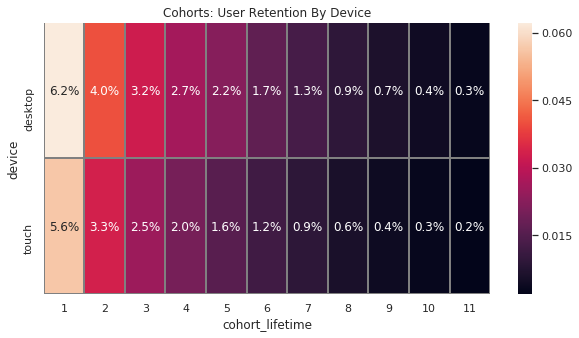

In [56]:
# Retention Rate для девайсов
cohorts_device['retention'] = cohorts_device['uid'] / cohorts_device['users_count']
# посчитаем retention
retention_device = cohorts_device.pivot_table(index='device',
                                              columns='cohort_lifetime',
                                              values='retention',
                                              aggfunc='sum')
# создадим тепловую карту
sns.set(style='white')
plt.figure(figsize=(10, 5))
plt.title('Cohorts: User Retention By Device')
sns.heatmap(retention_device.drop(columns=[0]), annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

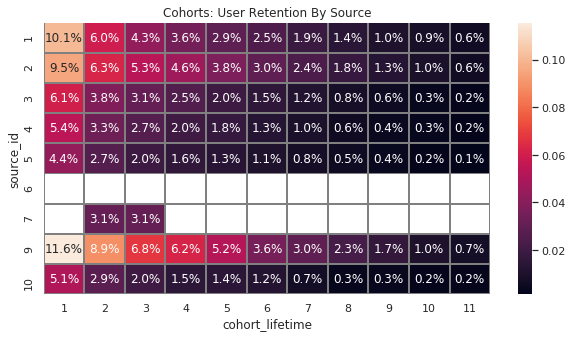

In [57]:
# Retention Rate для устройств
cohorts_source['retention'] = cohorts_source['uid'] / cohorts_source['users_count']
# посчитаем retention
retention_source = cohorts_source.pivot_table(index='source_id',
                                              columns='cohort_lifetime',
                                              values='retention',
                                              aggfunc='sum')
# создадим тепловую карту
sns.set(style='white')
plt.figure(figsize=(10, 5))
plt.title('Cohorts: User Retention By Source')
sns.heatmap(retention_source.drop(columns=[0]), annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

**Вывод:** сделаем выводы по **Retention Rate у пользователей, сгруппированных по девайсам** - несмотря на то, что пользователей десктопа больше, чем смартфонов почти в 2 раза, **Retention Rate**, на мой взгляд, **оказался примерно одинаковым** для обоих когорт, хотя также имеет довольно **низкие коэффициенты удержания**. После первого месяца и тех, и других остается **не более 6.5%** от изначального числа.

Теперь сделаем выводы по **Retention Rate у пользователей, сгруппированных по устройствам** - в данном случае 9 когорт, среди которых **наибольший Retention Rate у трех источников - 1, 2, 9** с удержанием после первого месяца **10.1%, 9.5%** и **11.6%** соответственно.
То есть лучшей платформой в данном случае оказался **desktop**, а лучшим источником привлечения - **9**.

<a id='section3'></a>
### Продажи
<a id='section3.1'></a>
**Когда люди начинают покупать?**

In [58]:
# для удобства объединим таблицы visits_log и orders_log
visits_log.head()

,device,end_ts,source_id,start_ts,uid,week,month,year,date,session_duration_sec,first_session_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,2017-12-01,2017,2017-12-20,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2018-02-01,2018,2018-02-19,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,2017-07-01,2017,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-01,2018,2018-05-20,1440,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,52,2017-12-01,2017,2017-12-27,0,2017-12-01,0


In [59]:
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [60]:
# найдем первую дату покупки и первое использование сервиса
visits_grouped = visits_log.groupby('uid')['start_ts'].min()
visits_grouped.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: start_ts, dtype: datetime64[ns]

In [61]:
orders_grouped = orders_log.groupby('uid')['buy_ts'].min()
orders_grouped.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: buy_ts, dtype: datetime64[ns]

In [62]:
merged_table = pd.merge(visits_grouped, orders_grouped, on='uid')

In [63]:
merged_table

,start_ts,buy_ts
uid,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...
18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00
18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00
18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00


In [64]:
# посмотрим, есть ли такие пользователи, которые совершили покупку раньше, чем зашли на сервис
merged_table.query('buy_ts < start_ts')

,start_ts,buy_ts
uid,,


In [65]:
# создадим новый столбец - разницу между первым посещением Афиши и первой покупкой
merged_table['mins_till_buy'] = ((merged_table['buy_ts'] - merged_table['start_ts']) / np.timedelta64(1, 'm')).round().astype('int')
merged_table['days_till_buy'] = (merged_table['mins_till_buy'] / 60 / 24).round().astype('int')
merged_table.head()

,start_ts,buy_ts,mins_till_buy,days_till_buy
uid,,,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,154022,107
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,0
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79,0
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184,1
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,0


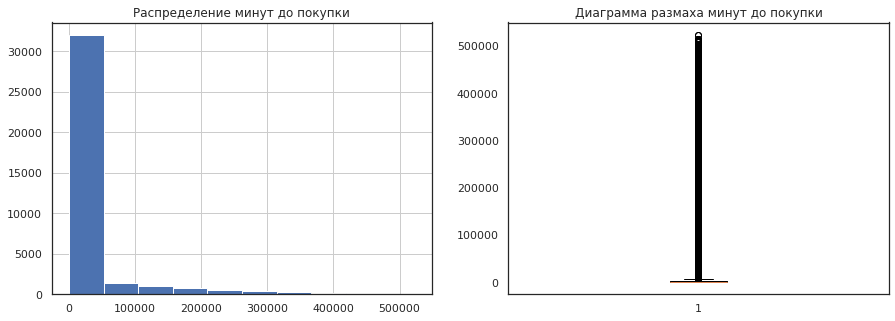

In [66]:
fg, ax = plt.subplots(1,2, figsize=(15,5))
merged_table['mins_till_buy'].hist(bins=10, ax=ax[0])
ax[1].boxplot(merged_table['mins_till_buy'])
ax[0].set_title('Распределение минут до покупки')
ax[1].set_title('Диаграмма размаха минут до покупки')
plt.show()

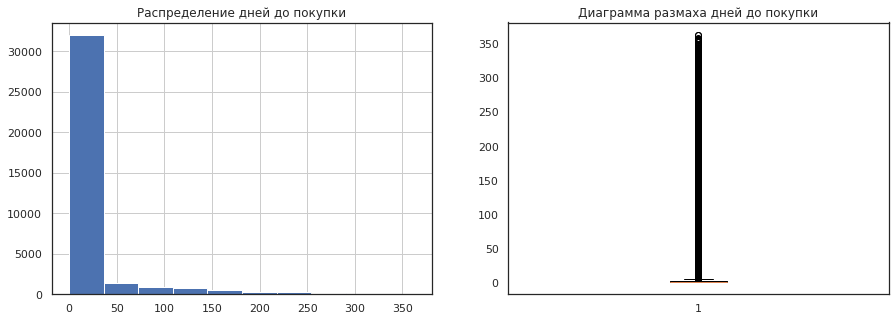

In [67]:
fg, ax = plt.subplots(1,2, figsize=(15,5))
merged_table['days_till_buy'].hist(bins=10, ax=ax[0])
ax[1].boxplot(merged_table['days_till_buy'])
ax[0].set_title('Распределение дней до покупки')
ax[1].set_title('Диаграмма размаха дней до покупки')
plt.show()

In [68]:
# вычислим среднее количество часов до покупки
print('Среднее количество минут до покупки', merged_table['mins_till_buy'].median())

Среднее количество минут до покупки 16.0


**Вывод:** в среднем пользователь совершает покупку на сервисе с момента первого посещения через 16 минут. Наверное, для Яндекс.Афиши это неплохой результат. Также можно заметить, что есть и такие пользователи, котрые совершали покупки через один, два, три и более месяцев с момента первого посещения Афиши.

<a id='section3.2'></a>
**Сколько раз покупают за период?**

Посчитаем сколько пользователи делают заказов в среднем за один месяц.

In [69]:
# создадим новый столбец в orders_log - месяц покупки
orders_log['purchase_month'] =( orders_log['buy_ts'].astype('datetime64[M]')).dt.strftime('%Y-%m')
orders_log.head()

,buy_ts,revenue,uid,purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06


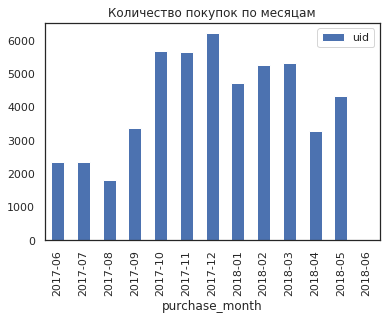

In [70]:
# сгруппируем по месяцам количество покупок
purchases_by_month = orders_log.groupby('purchase_month').agg({'buy_ts':'count',
                                                               'uid':'nunique',
                                                               'revenue':'sum'})
purchases_by_month.columns = ['purchases_cnt', 'users_cnt', 'revenue_for_month']
orders_log.pivot_table(index='purchase_month',
                       values='uid',
                       aggfunc='count').plot(kind='bar')
plt.title('Количество покупок по месяцам')
plt.show()

In [71]:
# посчитаем среднее количество заказов в месяц
print('Среднее количество заказов в месяц:', round(purchases_by_month['purchases_cnt'].mean()))

Среднее количество заказов в месяц: 3878


In [72]:
# посчитаем среднее количество заказов на одного пользователя в месяц
purchases_by_month['buys_per_user'] = purchases_by_month['purchases_cnt'] / purchases_by_month['users_cnt']
purchases_by_month[['buys_per_user']]

,buys_per_user
purchase_month,
2017-06,1.163618
2017-07,1.191028
2017-08,1.227582
2017-09,1.231636
2017-10,1.214759
2017-11,1.244557
2017-12,1.258195
2018-01,1.211134
2018-02,1.240254


In [73]:
print('Среднее количество заказов на пользователя в месяц:', round(purchases_by_month['buys_per_user'].mean()))

Среднее количество заказов на пользователя в месяц: 1


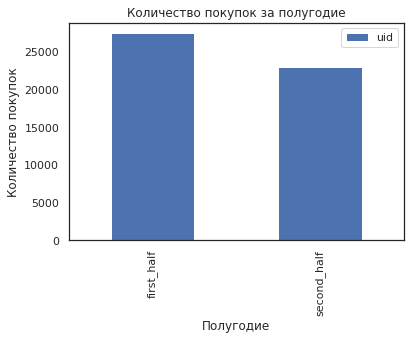

In [74]:
def half_of_year(val):
    if val <= '2017-12':
        return 'first_half' # 2017-06 - 2017-12 
    else:
        return 'second_half' # 2018-01 - 2018-06

# посмотрим на среднее количество заказов за полугодие

orders_log['half_year'] = orders_log['purchase_month'].apply(half_of_year)
purchases_by_half_year = orders_log.groupby('half_year').agg({'buy_ts':'count',
                                                              'uid':'nunique',
                                                              'revenue':'sum'})
purchases_by_half_year.columns = ['purchases_cnt', 'users_cnt', 'revenue_for_half']
orders_log.pivot_table(index='half_year',
                       values='uid',
                       aggfunc='count').plot(kind='bar')
plt.title('Количество покупок за полугодие')
plt.xlabel('Полугодие')
plt.ylabel('Количество покупок')
plt.show()

In [75]:
# посчитаем среднее количество заказов на одного пользователя в месяц
purchases_by_half_year['buys_per_user'] = purchases_by_half_year['purchases_cnt'] / purchases_by_half_year['users_cnt']
purchases_by_half_year[['buys_per_user']]

,buys_per_user
half_year,
first_half,1.326844
second_half,1.315222


In [76]:
print('Среднее количество заказов на пользователя за полугодие:', round(purchases_by_half_year['buys_per_user'].mean()))

Среднее количество заказов на пользователя за полугодие: 1


**Вывод:** результаты вычислений показали, что в среднем за месяц пользователи совершают **3878 заказов**, при этом на одного пользователя в среднем приходится **1 заказ в месяц**. Также дополнительно посмотрели на количество заказов за полугодие: количество заказов за полугодие 2017 года на несколько тысяч больше, чем за полугодие в 2018 году. Среднее количество заказов на одного пользователя осталось таким же - 1 заказ на пользователя.

<a id='section3.3'></a>
**Какой средний чек?**

In [77]:
# так как на предыдущем шаге мы создали столбец revenue_for_month - помесячная выручка 
# посмотрим на среднюю выручку за месяц со всех пользователей
print('Средняя выручка за месяц:', round(purchases_by_month['revenue_for_month'].mean()))

Средняя выручка за месяц: 19389


In [78]:
purchases_by_month['revenue_per_user'] = purchases_by_month['revenue_for_month'] / purchases_by_month['users_cnt']
print('Средняя выручка с одного пользователя в месяц:', round(purchases_by_month['revenue_per_user'].mean()))

Средняя выручка с одного пользователя в месяц: 6


**Посмотрим на средний чек в зависимости от устройств и источников привлечения.**

In [79]:
# добавим к профилю пользователя информацию о его тратах
user_revenue = orders_log.groupby('uid').agg({'revenue':'sum'})
user_revenue.columns = ['revenue_sum']
users = (users.join(user_revenue, on='uid', how='left'))
users.head()

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,revenue_sum
uid,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6,70.69
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6,NaN
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6,0.37
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6,4.28
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6,NaN


In [80]:
# оставим только тех пользователей, которые совершали покупки
avg_check = users.loc[~users['revenue_sum'].isna()]
avg_check.head()

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,revenue_sum
uid,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6,70.69
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6,0.37
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6,4.28
2050423809815667474,2017-06-01 10:36:00,2017-06-01,2017-06-01,1,desktop,1.6,8.31
3520273333047097992,2017-06-01 20:08:00,2017-06-01,2017-06-01,1,desktop,1.6,0.24


In [81]:
# посчитаем средний чек пользователей в зависимости от устройств
avg_check_device = avg_check.reset_index().groupby('device').agg({'revenue_sum':'sum',
                                                                  'uid':'nunique'})
avg_check_device['avg_revenue'] = avg_check_device['revenue_sum'] / avg_check_device['uid']
avg_check_device

,revenue_sum,uid,avg_revenue
device,,,
desktop,211329.77,29211,7.234596
touch,40727.43,7312,5.569944


In [82]:
# посчитаем средний чек пользователей в зависимости от рекламных источников
avg_check_source = avg_check.reset_index().groupby('source_id').agg({'revenue_sum':'sum',
                                                                     'uid':'nunique'})
avg_check_source['avg_revenue'] = avg_check_source['revenue_sum'] / avg_check_source['uid']
avg_check_source.sort_values(by='avg_revenue', ascending=False)

,revenue_sum,uid,avg_revenue
source_id,,,
2,46923.61,3506,13.383802
1,31090.55,2899,10.724577
5,52624.02,6931,7.592558
4,56696.83,10296,5.506685
9,5759.40,1088,5.293566
3,54511.24,10473,5.204931
10,4450.33,1329,3.348631
7,1.22,1,1.220000


**Вывод:** на данном шаге выяснили, что **средняя выручка в месяц** составляет **19389 рублей**, а **средняя выручка с одного пользователя** в месяц составляет **6 рублей**. Довольно низкие показатели, хотя какие именно продукты есть у Яндекс.Афиши и какая их стоимость я не знаю.
Если смотреть на **выручку** в зависимости **от платформ**, то выручка с пользователей **десктопного** устройства составила **211330 рублей**, что в 5 раз больше выручки с пользователей **смартфонов** - **40727 рублей**.
Что касается **рекламных источников**, то большую выручку принесли пользователи, пришедшие с рекламного **источника №2** (13 руб/юзер), также одним из самых прибыльных каналов привлечения оказался **источник №1** (10 руб/юзер).

<a id='section3.4'></a>
**Сколько денег приносят? (LTV)**

Вычислим сразу по трем измерениям - месяцам, устройствам и рекламным источникам.

In [83]:
users.head()

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,revenue_sum
uid,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6,70.69
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6,NaN
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6,0.37
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6,4.28
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6,NaN


In [84]:
orders_log.head()

,buy_ts,revenue,uid,purchase_month,half_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,first_half
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,first_half
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,first_half
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,first_half
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,first_half


**Вывод:** результаты показали, что **лучшими из когорт оказались июньская и сентябрьская когорты.**\
Также был посчитан LTV средней когорты, чтобы узнать, сколько денег могут тратить маркетологи на привлечение одного покупателя, если хотят, чтобы реклама окупилась за 6 месяцев. Таким образом, **маркетологи могут тратить не более 7,5 рублей на привлечение одного пользователя.**

**Вычислим LTV в зависимости от устройств и источников привлечения.**

Сначала вычислим LTV.

In [85]:
# для расчетов будем использовать профиль пользователя - датафрейм users
users.head(3)

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,revenue_sum
uid,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6,70.69
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6,NaN
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6,0.37


In [86]:
orders_log.head(3)

,buy_ts,revenue,uid,purchase_month,half_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,first_half
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,first_half
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,first_half


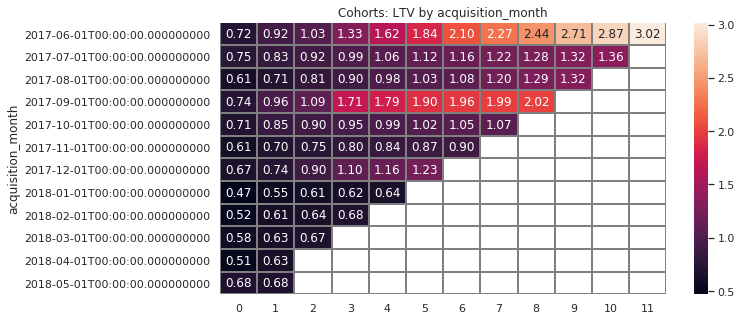

----LTV средней когорты acquisition_month
1.29


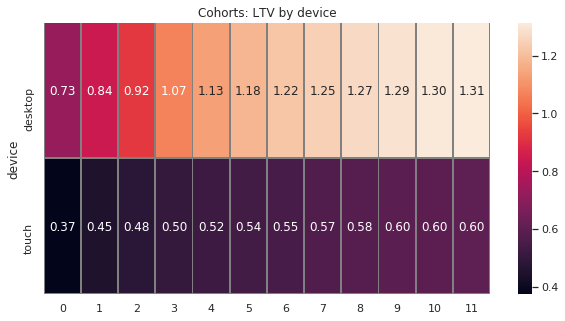

----LTV средней когорты device
0.86


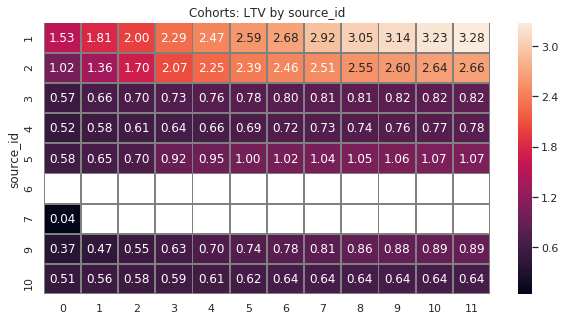

----LTV средней когорты source_id
1.26


In [87]:
# посчитаем LTV сразу по трем измерениям

dimensions = ['acquisition_month', 'device', 'source_id']

for dimension in dimensions:
    cohorts_dimension = (users.groupby(dimension).agg({'source_id':'count','acquisition_cost':'sum'})
                                      .rename(columns={'source_id':'cohort_size'}))
    ltv = orders_log.set_index('uid').join(users, how='left')[['acquisition_month', 'source_id', 'device',
                                                               'purchase_month', 'revenue']]
    ltv['purchase_month'] = ltv['purchase_month'].astype('datetime64[M]')
    # найдем возраст когорт
    ltv['age'] = ((ltv['purchase_month'] - ltv['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')
    
    ltv['acquisition_month'] = ltv['acquisition_month'].dt.strftime('%Y-%m')
    
    ltv = ltv.groupby([dimension, 'age']).agg({'revenue':'sum'})
    ltv = ltv.pivot_table(index=dimension,
                          columns='age',
                          values='revenue',
                          aggfunc='sum').cumsum(axis=1)
       
    ltv = cohorts_dimension[['cohort_size']].join(ltv)
    ltv = ltv.div(ltv['cohort_size'], axis=0).drop(columns = ['cohort_size'])

    # выведем таблицу LTV
    plt.figure(figsize=(10, 5))
    plt.title('Cohorts: LTV by '+ dimension)
    sns.heatmap(ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    # sns.heatmap(ltv.dropna(), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    plt.show();
    
    # посчитаем LTV средней когорты
    m6_cum_ltv = ltv.mean(axis=0)[5].round(2)
    print('----LTV средней когорты {}'.format(dimension))
    print(m6_cum_ltv)

**Вывод:** рассмотрим полученные результаты в разрезе девайсов и рекламных источников.

**Выводы по месяцу привлечения.**\
Как видно по тепловой карте наибольшее **LTV** показали июньская и сентябрьская когорты. В целом в первые 4 месяца показатели лучше, чем за остальное время.

**Выводы по устройствам.**\
В целом **результаты лучше у пользователей десктопных устройств.** Также был посчитан **LTV средней когорты**, чтобы узнать, сколько денег могут тратить маркетологи на привлечение одного покупателя, если хотят, чтобы реклама окупилась за 6 месяцев. Таким образом, **маркетологи могут тратить не более 0.86 рублей на привлечение одного пользователя.**

**Выводы по источникам привлечения.**\
Если смотреть на **LTV** когорт, то **лучшими оказались источники привлечения №1 и №2**, один пользователь этих когорт после 11 месяцев приносит **3.28 и 2.66 рублей соответственно.** Также в тройку вошел источник №5 с LTV 1.07 руб., что заметно ниже предыдущих. При этом **привлечение одного пользователя не должно превышать в среднем 1.26 рублей.**

<a id='section4'></a>
### Маркетинг

<a id='section4.1'></a>
**Сколько денег потратили? Всего / на каждый источник / по времени**

In [88]:
# посмотрим сколько всего денег было потрачено всего
costs['costs'].sum()

329131.62

In [89]:
# теперь посмотрим сколько было потрачено в зависимости от источников привлечения
source_grouped = costs.groupby('source_id')['costs'].sum()
source_grouped.sort_values(ascending=False)

source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64

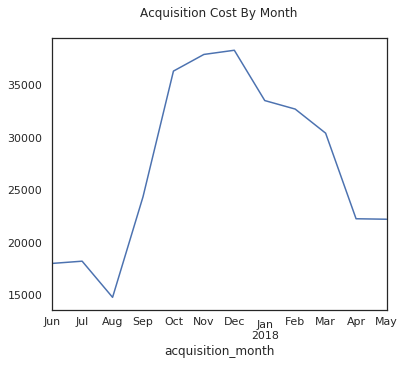

In [90]:
# теперь посмотрим сколько было потрачено в зависимости от месяца привлечения
month_grouped = users.groupby('acquisition_month')['acquisition_cost'].sum()
month_grouped.plot(figsize=(6,5))
plt.title('Acquisition Сost By Month\n')
plt.show()

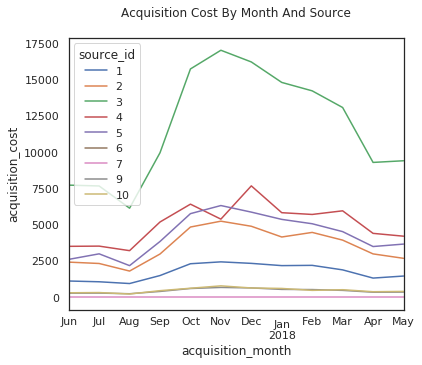

In [91]:
# посчитаем сколько было потрачено в зависимости от месяца привлечения
month_source_grouped = users.groupby(['acquisition_month', 'source_id'])['acquisition_cost'].sum()
month_source_grouped.reset_index().pivot_table(index='acquisition_month',
                                 columns='source_id',
                                 values='acquisition_cost',
                                 aggfunc='sum').plot(figsize=(6,5))
plt.title('Acquisition Сost By Month And Source\n')
plt.ylabel('acquisition_cost')
plt.show()

**Вывод:** на привлечение пользователей всего было потрачено 329132 рубля. Если смотреть в разрезе источников, то больше всего денег вложено в рекламный источник №3. Как видно по графику, вложения в источник №3 намного выше за каждый месяц по сравнению с остальными. Примерно одинаковые вложения в рекламные источники №4, №5 и №2. Очень низкие вложения в источники №7 и №10.  

<a id='section4.2'></a>
**Сколько стоило привлечение одного покупателя из каждого источника?**

In [92]:
# посчитаем САС в зависимости от источников
cohorts_source = (users.groupby('source_id').agg({'source_id':'count','acquisition_cost':'sum'})
                                      .rename(columns={'source_id':'cohort_size'}))
cac_source = (users.groupby('source_id')['acquisition_cost'].sum()).div(cohorts_source['cohort_size'], axis=0)
cac_source.sort_values(ascending=False)

source_id
2     2.429952
1     2.200155
3     2.137480
5     1.051169
9     0.845909
4     0.844188
10    0.843274
7     0.000000
6     0.000000
dtype: float64

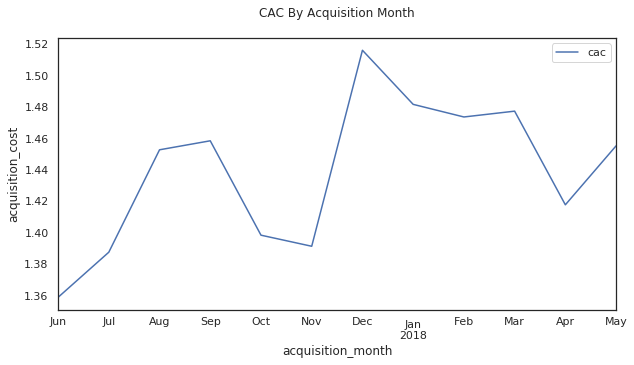

In [93]:
# посчитаем CAC в зависимости от времени
cac_time = (users.groupby('acquisition_month').agg({'source_id':'count','acquisition_cost':'sum'})
                                      .rename(columns={'source_id':'cohort_size'}))
cac_time['cac'] = cac_time['acquisition_cost'] / cac_time['cohort_size']
cac_time.pivot_table(index='acquisition_month',
                     values='cac',
                     aggfunc='sum').plot(figsize=(10,5))
plt.title('CAC By Acquisition Month\n')
plt.ylabel('acquisition_cost')
plt.show()

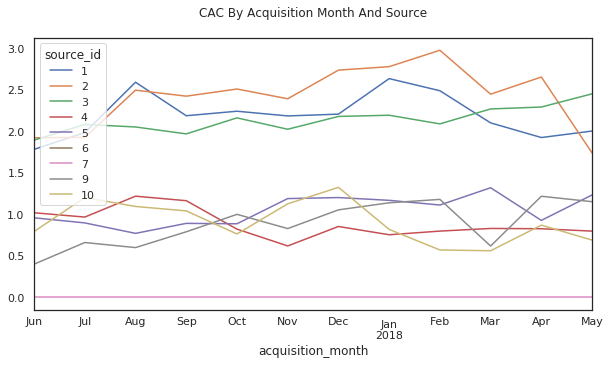

In [94]:
# посчитаем CAC в зависимости от времени и источников
cac_time_source = (users.groupby(['acquisition_month', 'source_id']).agg({'source_id':'count','acquisition_cost':'sum'})
                                                             .rename(columns={'source_id':'cohort_size'}))
cac_time_source['cac'] = cac_time_source['acquisition_cost'] / cac_time_source['cohort_size']
cac_time_source.pivot_table(index='acquisition_month',
                            columns='source_id',
                            values='cac',
                            aggfunc='sum').plot(figsize=(10,5))
plt.title('CAC By Acquisition Month And Source\n')
plt.show()

**Вывод:** наибольшая цена привлечения одного пользователя оказалась у источника №2 (2.42 руб/юзер), в топ-3 также вошли №1 (2.20 рб/юзер) и №3 (2.13 руб/юзер).\
Если рассматривать САС (Customer acquisition cost) в зависимости от времени, то наименьший CAC пришелся на июнь 2017 года, а наибольший - на декабрь 2017 года. Также низкая стоимость привлечения пользователей была в ноябре.\
Если рассматривать стоимость привлечения пользователя по источникам в зависимости от месяца, то наибольша стоимость у источника №2 (достигает пика в феврале 2018 года), далее расположились источники №2 и №3. 

<a id='section4.3'></a>
**На сколько окупились расходы? (ROI)**

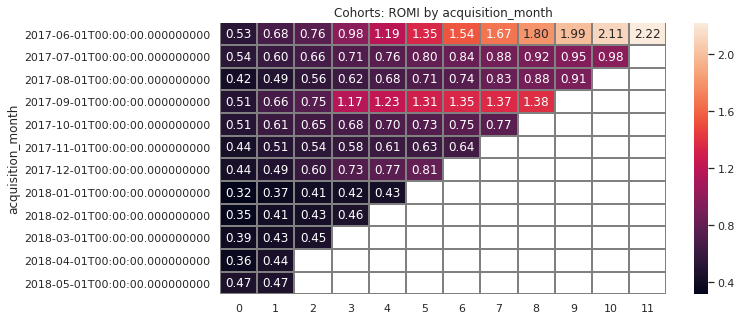

----Средняя окупаемость acquisition_month----
0     0.439460
1     0.512792
2     0.580159
3     0.705161
4     0.796324
5     0.906419
6     0.977413
7     1.102181
8     1.246429
9     1.284708
10    1.545920
11    2.221818
dtype: float64


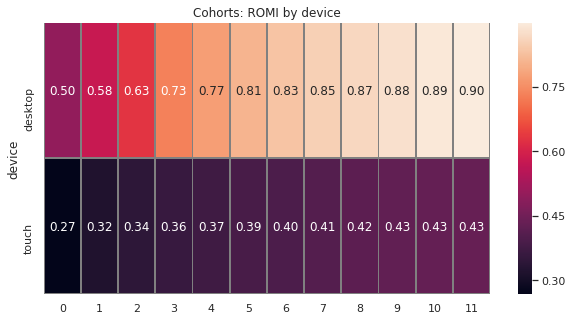

----Средняя окупаемость device----
0     0.382957
1     0.448557
2     0.487642
3     0.545976
4     0.573434
5     0.597611
6     0.614838
7     0.630163
8     0.642361
9     0.654720
10    0.661312
11    0.666146
dtype: float64


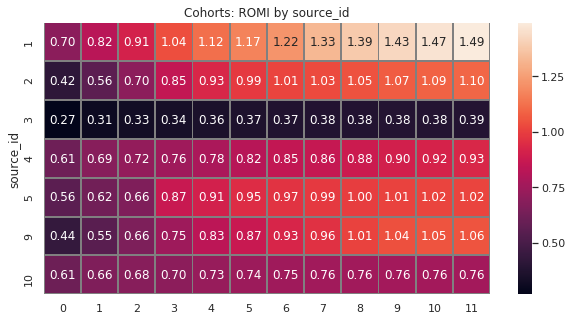

----Средняя окупаемость source_id----
0     0.513964
1     0.601919
2     0.665550
3     0.758331
4     0.807764
5     0.843926
6     0.872551
7     0.900974
8     0.923649
9     0.943174
10    0.955156
11    0.962828
dtype: float64


In [99]:
dimensions = ['acquisition_month', 'device', 'source_id']
#  romi = 0
for dimension in dimensions:
    cohorts = (users.groupby(dimension).agg({'source_id':'count','acquisition_cost':'sum'})
                                      .rename(columns={'source_id':'cohort_size'}))
    ltv = orders_log.set_index('uid').join(users, how='left')[['acquisition_month', 'source_id', 'device',
                                                               'purchase_month', 'revenue']]
    ltv['purchase_month'] = ltv['purchase_month'].astype('datetime64[M]')
    # найдем возраст когорт
    ltv['age'] = ((ltv['purchase_month'] - ltv['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')
    ltv = ltv.groupby([dimension, 'age']).agg({'revenue':'sum'})
    ltv = ltv.pivot_table(index=dimension,
                          columns='age',
                          values='revenue',
                          aggfunc='sum').cumsum(axis=1)
    # посчитаем CAC 
    cac = (users.groupby(dimension)['acquisition_cost'].sum()).div(cohorts['cohort_size'], axis=0)
    
    ltv = cohorts[['cohort_size']].join(ltv)
    ltv = ltv.div(ltv['cohort_size'], axis=0).drop(columns = ['cohort_size'])
    
    # посчитаем ROMI
    romi = ltv.div(cac, axis=0)
    
    # выведем таблицу ROMI
    plt.figure(figsize=(10, 5))
    plt.title('Cohorts: ROMI by '+ dimension)
    if dimension == 'source_id':
        romi = romi.dropna()
    sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    plt.show();
    
    # узнаем, как быстро когорты окупаются
    print('----Средняя окупаемость {}----'.format(dimension))
    print(romi.mean(axis=0))

**Вывод:** в результате был посчитан ROMI. Рассмотрим разные случаи.

 **В общем случае**\
В итоге, **быстрее всего окупаются июньская и сентябрьская когорты.** Более того, это единственные когорты, которые окупились. Причем, сентябрьская когорта окупилась уже на 4 месяц. В среднем пользователи окупаются после 6 месяцев.

**В зависимости от устройств**\
Результаты оказались лучше у пользователей десктопных устройств, но стоит отметить, что за год пользователи не окупились. После 11 месяцев пользования Яндекс.Афиши ROMI составил 0.9 для десктопа и 0.43 для смартфонов. Среднее ROMI также показало не лучшие результаты.

**В зависимости от источников привлечения**\
Окупились пользователи рекламных источников №1, №2, №9 и №5. При этом первая когорта окупилась уже после 3 месяцев пользования Яндекс.Афишой и под конец года приносила 50% от привлечения. Если смотреть на средний ROMI, то в среднем когорты не смогли окупиться. После 11 месяцев использования они покрыли привлечение на 95%.

<a id='section5'></a>
### Общий вывод

В конечном итоге мною были проанализированы данные сервиса *Яндекс.Афиша*. На первом этапе был проведен первичный взгляд на данные. Далее были обработаны три датафрейма - visits_log (данные о визитах Афиши), orders_log (данные о покупках) и costs (информация о затратах на маркетинг). Так, были преобразованы признаки с датами и временем к соответсвующим типам.

**Выводы по продукту**\
В месяц продуктом пользуется 23228 уникальных пользователей. Также был дополнительно посчитан "Sticky factor" - степень лояльности и вовлеченности пользователя, то есть регулярность использования продукта. Так, в месяц к продукту возвращаются около 4% пользователей.\
Наибольшее количество уникальных пользователей в день и в месяц приходится на пользователей, заходящих на сервис с компьютера. Что касается источников, то наибольшее количество пользователей приходится на рекламные источники №2,3,4,5.\
В среднем на пользователя приходится 1 сессия независимо от платформ и рекламного источника. Также как и в общем случае, средняя продолжнительность сессии на пользователя в зависимости от девайса и источника привелечения составляет 60 секунд.\
**Retention Rate.** Конвертация пользователей (Retention Rate) ни одной из когорт не превысила 10% ни за первый, ни за последующие месяцы. Самый высокий Retention Rate за первый месяц у пользователей, которые пришли осенью 2017 года.\
Несмотря на то, что пользователей десктопа больше, чем смартфонов почти в 2 раза, Retention Rate, на мой взгляд, оказался примерно одинаковым для обоих когорт, хотя также имеет довольно низкие коэффициенты удержания.\
Если рассматривать Retention Rate у пользователей, сгруппированных по устройствам - в данном случае 9 когорт, среди которых наибольший Retention Rate у трех источников - 1, 2, 9 с удержанием после первого месяца 10.1%, 9.5% и 11.6% соответственно. То есть лучшей платформой с точки зрения конвертации пользователей оказался desktop, а лучшим источником привлечения - №9.

**Выводы по продажам**\
В среднем пользователь совершает покупку на сервисе с момента первого посещения через 16 минут. Также в среднем за месяц пользователи совершают 3878 заказов, при этом на одного пользователя приходится 1 заказ в месяц.\
Средняя выручка в месяц составляет 19389 рублей, а средняя выручка с одного пользователя в месяц составляет 6 рублей. Если смотреть на выручку в зависимости от платформ, то выручка с пользователей десктопного устройства составила 211330 рублей, что в 5 раз больше выручки с пользователей смартфонов - 40727 рублей. Что касается рекламных источников, то большую выручку принесли пользователи, пришедшие с рекламного источника №2 (13 руб/юзер), также одним из самых прибыльных каналов привлечения оказался источник №1 (10 руб/юзер).\
**LTV.** В целом результаты лучше у пользователей десктопных устройств. С точки зрения рекламы лучшими оказались источники привлечения №1 и №2, один пользователь этих когорт после 11 месяцев приносит 3.28 и 2.66 рублей соответственно. Также в тройку вошел источник №5 с LTV 1.07 руб., что заметно ниже предыдущих.

**Маркетинг**\
На привлечение пользователей всего было потрачено 329132 рубля. Если смотреть в разрезе источников, то больше всего денег вложено в рекламный источник №3. Вложения в источник №3 намного выше за каждый месяц по сравнению с остальными. Примерно одинаковые вложения в рекламные источники №4, №5 и №2.\
**CAC.** Наибольшая цена привлечения одного пользователя оказалась у источника №2 (2.42 руб/юзер), в топ-3 также вошли №1 (2.20 рб/юзер) и №3 (2.13 руб/юзер).\ 
**ROI.** Лучшая окупаемость оказалась у пользователей десктопных устройств, но стоит отметить, что за год пользователи так и не окупились. После 11 месяцев пользования Яндекс.Афиши ROMI составил 0.9 для десктопа и 0.43 для смартфонов.\
Если рассматривать источники, то окупились пользователи рекламных источников №1, №2, №9 и №5. При этом первая когорта окупилась уже после 3 месяцев пользования Яндекс.Афишой и под конец года приносила 50% от привлечения.

**Рекомендации по лучшим платформам и рекламным источникам**\
По результатам всего анализа можно сделать вывод, что **лучшим устройством оказались десктопные устройства**: с нее заходит больше пользователей, она приносит больше выручки и лучше окупается.\
Что касается рекламных источников, то я бы выделил два из них - **№1 и №2** (с небольшим преимуществом первого). Пользователи, привлеченные с этих источников, чаще возвращаются к Афише. Плюс, они принесли больше выручки, как в общем, так и на одного пользователя. Хотя и привлечение каждого пользователя из этих источников в среднем оказалось самым большим. Как результат, пользователи, пришедшие с этих источников, окупились.